In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('car data.csv')

In [3]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
df.shape

(301, 9)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [6]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [7]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [8]:
from sklearn.preprocessing import LabelEncoder

In [9]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [10]:
name_label=LabelEncoder()
df['Car_Name']=name_label.fit_transform(df['Car_Name'])

In [11]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,90,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,93,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,68,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,96,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,92,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [12]:
fuel_label=LabelEncoder()
df['Fuel_Type']=fuel_label.fit_transform(df['Fuel_Type'])

In [13]:
seller_label=LabelEncoder()
df['Seller_Type']=seller_label.fit_transform(df['Seller_Type'])

In [14]:
transmission_label=LabelEncoder()
df['Transmission']=transmission_label.fit_transform(df['Transmission'])

In [15]:
print(df['Car_Name'].unique())
print(df['Fuel_Type'].unique())
print(df['Seller_Type'].unique())
print(df['Transmission'].unique())

[90 93 68 96 92 95 91 62 76 73 63 85  0 65 89 81 86 71 77 78 80 70 79 67
 88 49 56 42 11 46 43 40 48 41 44 17 45 47  6  4 32 60 58 51 14 37 20  7
  5 57 12 15 52 26 16 61 31 54 38  8 28  1 25 34 59 13  2 35 22 39 30 53
 23 27 33  9 50 55 36 21 29 10 24 19 18  3 84 82 83 75 97 74 72 94 69 66
 64 87]
[2 1 0]
[0 1]
[1 0]


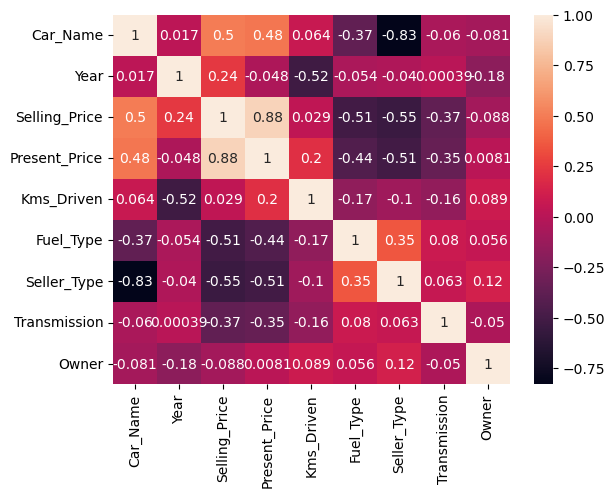

In [16]:
sns.heatmap(data=df.corr(),annot=True)
plt.show()

In [17]:
X=df.drop(['Selling_Price'],axis=1)
y=df['Selling_Price']

In [18]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [20]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [21]:
X_train_scaled

array([[-1.86352444, -1.96986094, -0.75359579, ...,  1.33816952,
         0.37796447,  3.52821143],
       [-2.17378866,  1.15644297, -0.73130669, ...,  1.33816952,
         0.37796447, -0.18569534],
       [-1.70839234, -1.96986094, -0.7494723 , ...,  1.33816952,
         0.37796447, -0.18569534],
       ...,
       [-0.85516574,  0.11434167, -0.45269297, ...,  1.33816952,
         0.37796447,  3.52821143],
       [ 0.26954204, -0.92775963,  0.27727498, ..., -0.74728947,
         0.37796447, -0.18569534],
       [-0.77759969,  1.15644297, -0.63880693, ...,  1.33816952,
         0.37796447, -0.18569534]], shape=(240, 8))

In [22]:
X_test_scaled

array([[-1.24299601,  0.80907587, -0.77365597, -0.32344157,  0.48236665,
         1.33816952, -2.64575131, -0.18569534],
       [ 0.26954204,  0.80907587,  0.67847874, -0.63518537,  0.48236665,
        -0.74728947,  0.37796447, -0.18569534],
       [ 1.23911771, -0.58039253,  0.21040769,  0.53852285, -1.88024551,
        -0.74728947,  0.37796447, -0.18569534],
       [-2.01865655, -0.92775963, -0.77365597, -0.06006356,  0.48236665,
         1.33816952,  0.37796447,  3.52821143],
       [ 0.34710809, -0.23302543,  1.23682064,  0.05967767,  0.48236665,
        -0.74728947,  0.37796447, -0.18569534],
       [ 0.23075901,  0.46170877,  0.15691385,  0.11632788, -1.88024551,
        -0.74728947,  0.37796447, -0.18569534],
       [-0.62246758,  0.46170877, -0.67335503, -0.27555466,  0.48236665,
         1.33816952,  0.37796447, -0.18569534],
       [-0.04072218,  0.11434167, -0.73910787, -0.70653687,  0.48236665,
         1.33816952,  0.37796447, -0.18569534],
       [-1.32056207,  0.80907587

In [23]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

In [24]:
lr = LinearRegression()
lr.fit(X_train_scaled,y_train)

LinearRegression()

In [25]:
lr1 = Lasso()
lr1.fit(X_train_scaled,y_train)

Lasso()

In [26]:
lr2 = Ridge()
lr2.fit(X_train_scaled,y_train)

Ridge()

In [27]:
lr3 = ElasticNet()
lr3.fit(X_train_scaled,y_train)

ElasticNet()

In [28]:
df = DecisionTreeRegressor()
df.fit(X_train_scaled,y_train)

DecisionTreeRegressor()

In [29]:
svr = SVR()
svr.fit(X_train_scaled,y_train)

SVR()

In [30]:
knn = KNeighborsRegressor()
knn.fit(X_train_scaled,y_train)

KNeighborsRegressor()

In [31]:
rf = RandomForestRegressor()
rf.fit(X_train_scaled,y_train)

RandomForestRegressor()

In [32]:
xg = XGBRegressor()
model_xgb = xg.fit(X_train_scaled,y_train)

In [33]:
y_pred_1 = lr.predict(X_test_scaled)

In [34]:
y_pred_2 = lr1.predict(X_test_scaled)

In [35]:
y_pred_3 = lr2.predict(X_test_scaled)

In [36]:
y_pred_4 = lr3.predict(X_test_scaled)

In [37]:
y_pred_5 = df.predict(X_test_scaled)

In [38]:
y_pred_6 = svr.predict(X_test_scaled)

In [39]:
y_pred_7 = knn.predict(X_test_scaled)

In [40]:
y_pred_8 = rf.predict(X_test_scaled)

In [41]:
y_pred_9 = model_xgb.predict(X_test_scaled)

In [42]:
from sklearn import metrics

In [43]:
score1 = metrics.r2_score(y_test,y_pred_1)
score1

0.8465539666857804

In [44]:
score2 = metrics.r2_score(y_test,y_pred_2)
score2

0.673899200516547

In [45]:
score3 = metrics.r2_score(y_test,y_pred_3)
score3

0.8460927766637647

In [46]:
score4 = metrics.r2_score(y_test,y_pred_4)
score4

0.69479388524355

In [47]:
score5 = metrics.r2_score(y_test,y_pred_5)
score5

0.9551642359291054

In [48]:
score6 = metrics.r2_score(y_test,y_pred_6)
score6

0.7811659968098953

In [49]:
score7 = metrics.r2_score(y_test,y_pred_7)
score7

0.9319069754201724

In [50]:
score8 = metrics.r2_score(y_test,y_pred_8)
score8

0.9628007566721083

In [51]:
score9 = metrics.r2_score(y_test,y_pred_9)
score9

0.9595049391082628

In [52]:
final_data = pd.DataFrame({'Models':['LR','LR1','LR2','LR3','DF','SVR','KNN','RF','XGB'],'R2_SCORE':[score1,score2,score3,score4,score5,score6,score7,score8,score9]})

In [53]:
final_data

,Models,R2_SCORE
0,LR,0.846554
1,LR1,0.673899
2,LR2,0.846093
3,LR3,0.694794
4,DF,0.955164
5,SVR,0.781166
6,KNN,0.931907
7,RF,0.962801
8,XGB,0.959505


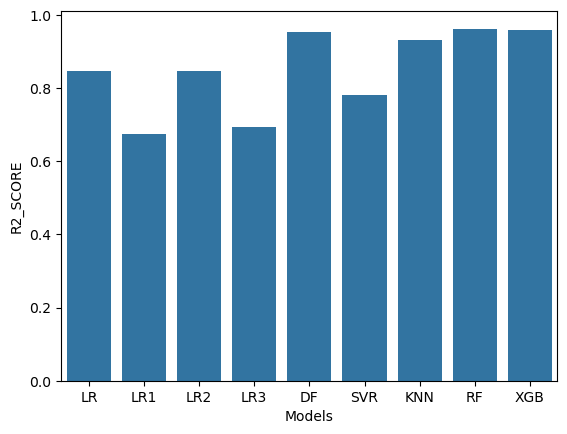

In [54]:
sns.barplot(x=final_data['Models'],y=final_data['R2_SCORE'])
plt.show()

In [55]:
X_test_scaled

array([[-1.24299601,  0.80907587, -0.77365597, -0.32344157,  0.48236665,
         1.33816952, -2.64575131, -0.18569534],
       [ 0.26954204,  0.80907587,  0.67847874, -0.63518537,  0.48236665,
        -0.74728947,  0.37796447, -0.18569534],
       [ 1.23911771, -0.58039253,  0.21040769,  0.53852285, -1.88024551,
        -0.74728947,  0.37796447, -0.18569534],
       [-2.01865655, -0.92775963, -0.77365597, -0.06006356,  0.48236665,
         1.33816952,  0.37796447,  3.52821143],
       [ 0.34710809, -0.23302543,  1.23682064,  0.05967767,  0.48236665,
        -0.74728947,  0.37796447, -0.18569534],
       [ 0.23075901,  0.46170877,  0.15691385,  0.11632788, -1.88024551,
        -0.74728947,  0.37796447, -0.18569534],
       [-0.62246758,  0.46170877, -0.67335503, -0.27555466,  0.48236665,
         1.33816952,  0.37796447, -0.18569534],
       [-0.04072218,  0.11434167, -0.73910787, -0.70653687,  0.48236665,
         1.33816952,  0.37796447, -0.18569534],
       [-1.32056207,  0.80907587

In [56]:
model_xgb.predict([[ 0.26954204,  0.80907587,  0.67847874, -0.63518537,  0.48236665,
        -0.74728947,  0.37796447, -0.18569534]])

array([10.417325], dtype=float32)

In [57]:
y_test

177     0.35
289    10.11
228     4.95
198     0.15
60      6.95
       ...  
234     5.50
296     9.50
281     2.10
285     7.40
182     0.30
Name: Selling_Price, Length: 61, dtype: float64

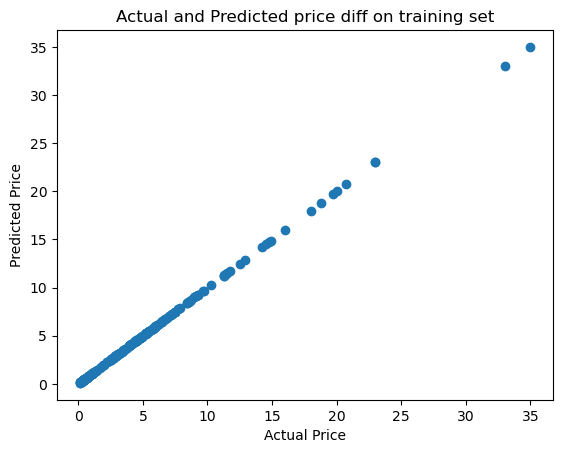

In [58]:
plt.scatter(y_train,model_xgb.predict(X_train_scaled))
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual and Predicted price diff on training set')
plt.show()

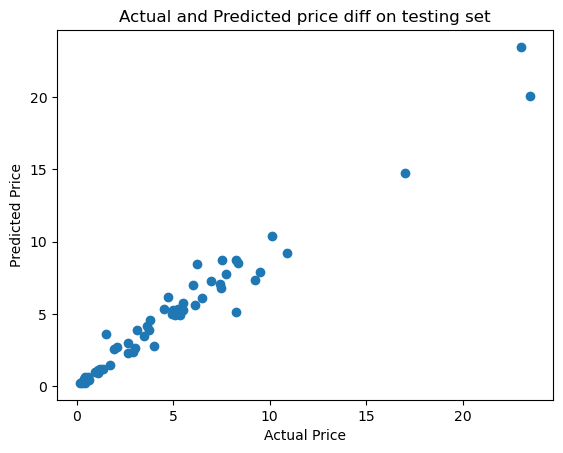

In [59]:
plt.scatter(y_test,model_xgb.predict(X_test_scaled))
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual and Predicted price diff on testing set')
plt.show()